In [2]:
import time
import pandas as pd

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

start_time = time.time()
from sklearn import svm
import sklearn.metrics
import numpy as np

In [3]:
datas = pd.read_csv(open("C:\\Users\\sivai\\OneDrive\\Desktop\\insurdata.csv"))

In [4]:
datas['Agency_Code'] = datas['Agency_Code'].map({'C2B': 0, 'EPX': 1,'CWT':2,'JZI':3})
datas['Type'] = datas['Type'].map({'Airlines': 0, 'Travel Agency': 1})
datas['Product Name'] = datas['Product Name'].map({'Customised Plan': 0, 'Cancellation Plan': 1,'Bronze Plan':2,'Silver Plan':3,'Gold Plan':4})
datas['Claimed'] = datas['Claimed'].map({'Yes': 0, 'No': 1})
datas['Channel'] = datas['Channel'].map({'Online': 0, 'Offline': 1})
datas['Destination'] = datas['Destination'].map({'ASIA': 0, 'EUROPE': 1,'Americas':2})

In [5]:
predictors = datas.values[:, 0:9]
targets = datas.values[:,9]

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size= 0.25)

In [6]:
print(pred_train.shape)
print(pred_test.shape)
print(tar_train.shape)
print(tar_test.shape)

(2250, 9)
(750, 9)
(2250,)
(750,)


In [7]:
features = list(datas.columns[:10])
features

['Age',
 'Agency_Code',
 'Type',
 'Claimed',
 'Commision',
 'Channel',
 'Duration',
 'Sales',
 'Product Name',
 'Destination']

In [8]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 1, splitter='best')
classifier = classifier.fit(pred_train,tar_train)

pred = classifier.predict(pred_test)

In [9]:
print(sklearn.metrics.confusion_matrix(tar_test, pred))

#classification accuracy
print("accuracy of training dataset is{:.2f}".format(classifier.score(pred_train,tar_train)))
print("accuracy of test dataset is {:.2f}".format(classifier.score(pred_test,tar_test)))
#print(accuracy_score(tar_test, predictions, normalize = True))

#error rate
print("Error rate is",1- accuracy_score(tar_test, pred, normalize = True))

#sensitivity
print("sensitivity is", sklearn.metrics.recall_score(tar_test, pred,labels=None, average =  'micro', sample_weight=None))
#specificity
print("specificity is", 1 - sklearn.metrics.recall_score(tar_test, pred,labels=None, average =  'micro', sample_weight=None))

#precision
#print("precision is",sklearn.metrics.precision_score(tar_test, predictions, labels=None, pos_label=1, average =  'micro' ,sample_weight=None))

#Recall


#time to execute
#print("time elapsed: {:.2f}s".format(time.time() - start_time))
results =[]
results.append(accuracy_score(tar_test, pred, normalize = True))
classification = 1 - accuracy_score(tar_test, pred, normalize = True)
results.append(classification)
sensi = sklearn.metrics.recall_score(tar_test, pred, labels=None, average =  'micro', sample_weight=None)
results.append(sensi)

specificity = 1 - sensi
results.append(specificity)

list2 = ["accuracy" , "classifiacation" , "sensitivity" , "specificity"]

[[560  13  29]
 [ 20  16  15]
 [ 40  20  37]]
accuracy of training dataset is1.00
accuracy of test dataset is 0.82
Error rate is 0.18266666666666664
sensitivity is 0.8173333333333334
specificity is 0.18266666666666664


<BarContainer object of 4 artists>

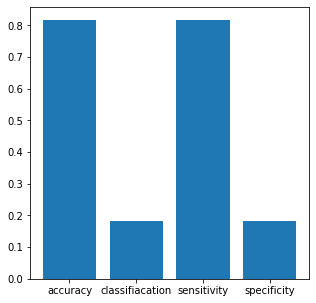

In [14]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (5, 5))
plt.bar(list2 , results )